<a href="https://colab.research.google.com/github/jtowgood/DAT490Capstone/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Link google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
alcohol_path = "/content/drive/My Drive/alcohol_improved.csv"
income_path = "/content/drive/My Drive/income_improved.csv"
population_path = "/content/drive/My Drive/pop_improved.csv"

In [ ]:
# create dataframe for liquor sales, income, population size
df_alcohol = pd.read_csv(alcohol_path)
df_income = pd.read_csv(income_path)
df_population = pd.read_csv(population_path)

In [ ]:
df_alcohol.head()

,Date,Store Number,County,Category Name,Item Description,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Month,Year
0,2018-11-28,2536,POLK,TENNESSEE WHISKIES,GENTLEMAN JACK,20.01,30.02,2,60.04,1.50,11,2018
1,2024-07-29,10165,SCOTT,NEUTRAL GRAIN SPIRITS FLAVORED,OLE SMOKY WHITE CHOCOLATE STRAWBERRY CREAM,13.00,19.50,1,19.50,0.75,7,2024
2,2019-11-08,5851,LOUISA,WHISKEY LIQUEUR,FIREBALL CINNAMON WHISKEY MINI DISPENSER,30.00,45.00,1,45.00,0.05,11,2019
3,2014-03-25,4490,LINN,TENNESSEE WHISKIES,JACK DANIELS OLD #7 BLACK LBL,14.04,21.05,3,63.15,2.25,3,2014
4,2020-08-18,2535,POLK,100% AGAVE TEQUILA,PATRON SILVER,27.50,41.25,1,41.25,0.75,8,2020


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Get columns I need
df_alcohol_trimmed = df_alcohol[['County', 'Sale (Dollars)', 'Volume Sold (Liters)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Category Name']]
df_income_trimmed = df_income[['County', 'Average Income ($)']]
df_income_trimmed.head()
#Drop null values

df_alcohol_trimmed = df_alcohol_trimmed.dropna()
df_alcohol_trimmed.info()

# Make sure county names are formatted the same
df_income_trimmed['County'] = df_income_trimmed['County'].str.lower()
df_alcohol_trimmed['County'] = df_alcohol_trimmed['County'].str.lower()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496944 entries, 0 to 496943
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   County                496944 non-null  object 
 1   Sale (Dollars)        496944 non-null  float64
 2   Volume Sold (Liters)  496944 non-null  float64
 3   State Bottle Cost     496944 non-null  float64
 4   State Bottle Retail   496944 non-null  float64
 5   Bottles Sold          496944 non-null  int64  
 6   Category Name         496944 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 26.5+ MB


<ipython-input-15-b645b440611d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_trimmed['County'] = df_income_trimmed['County'].str.lower()


In [ ]:
# Join alcohol sales with income data
df_merged = df_income_trimmed.merge(df_alcohol_trimmed, on='County', how='inner')

# Add revenue from sale feature by subtracting cost from retail
df_merged['Revenue'] = df_merged['Sale (Dollars)'] - df_merged['State Bottle Cost'] * df_merged['Bottles Sold']
df_merged.head()

,County,Average Income ($),Sale (Dollars),Volume Sold (Liters),State Bottle Cost,State Bottle Retail,Bottles Sold,Category Name,Revenue
0,adair,54098.0,135.00,10.50,15.00,22.50,6,CANADIAN WHISKIES,45.00
1,adair,54098.0,20.25,0.75,13.50,20.25,1,IMPORTED DRY GINS,6.75
2,adair,54098.0,99.00,10.50,11.00,16.50,6,CANADIAN WHISKIES,33.00
3,adair,54098.0,70.56,10.50,7.84,11.76,6,WHITE RUM,23.52
4,adair,54098.0,24.12,4.00,3.85,6.03,4,AMERICAN COCKTAILS,8.72


In [ ]:
#Use standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_merged[['Sale (T)', 'Volume Sold (T)', 'State Bottle Cost (T)', 'State Bottle Retail (T)', 'Bottles Sold (T)', 'Revenue (T)']] = scaler.fit_transform(df_merged[['Sale (Dollars)', 'Volume Sold (Liters)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Revenue']])
df_merged.head()

,County,Average Income ($),Sale (Dollars),Volume Sold (Liters),State Bottle Cost,State Bottle Retail,Bottles Sold,Category Name,Revenue,Sale (T),Volume Sold (T),State Bottle Cost (T),State Bottle Retail (T),Bottles Sold (T),Revenue (T)
0,adair,54098.0,135.00,10.50,15.00,22.50,6,CANADIAN WHISKIES,45.00,-0.022236,0.041533,0.412480,0.411951,-0.172786,-0.022225
1,adair,54098.0,20.25,0.75,13.50,20.25,1,IMPORTED DRY GINS,6.75,-0.268907,-0.245560,0.266546,0.265991,-0.352127,-0.268408
2,adair,54098.0,99.00,10.50,11.00,16.50,6,CANADIAN WHISKIES,33.00,-0.099623,0.041533,0.023322,0.022726,-0.172786,-0.099459
3,adair,54098.0,70.56,10.50,7.84,11.76,6,WHITE RUM,23.52,-0.160758,0.041533,-0.284112,-0.284761,-0.172786,-0.160474
4,adair,54098.0,24.12,4.00,3.85,6.03,4,AMERICAN COCKTAILS,8.72,-0.260588,-0.149862,-0.672297,-0.656471,-0.244522,-0.255729


In [ ]:
# Cluster on Revenue and Total Sales

# Find optimal number of clusters using 'Elbow Method' (Got it from youtube channel "Andy McDonald")
def optimize_k_means(data, max_k):
    means = []
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)


    # Generate the elbow plot
    fig = plt.figure(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

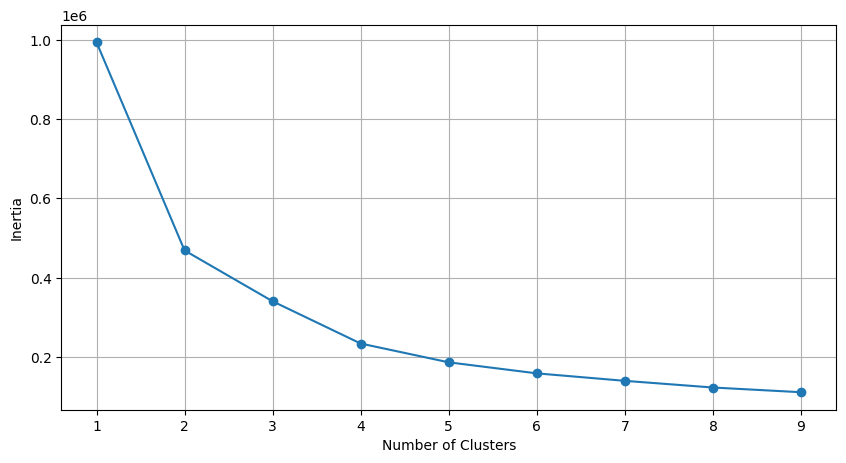

In [ ]:
# Run function using 10 clusters
optimize_k_means(df_merged[['Revenue (T)', 'Volume Sold (T)']], 10)

In [ ]:
# Now run kmeans with 5 clusters
kmeans = KMeans(n_clusters=5)
df_merged['Cluster_5'] = kmeans.fit_predict(df_merged[['Revenue (T)', 'Volume Sold (T)']])
df_merged.head()

,County,Average Income ($),Sale (Dollars),Volume Sold (Liters),State Bottle Cost,State Bottle Retail,Bottles Sold,Category Name,Revenue,Sale (T),Volume Sold (T),State Bottle Cost (T),State Bottle Retail (T),Bottles Sold (T),Revenue (T),Cluster_5
0,adair,54098.0,135.00,10.50,15.00,22.50,6,CANADIAN WHISKIES,45.00,-0.022236,0.041533,0.412480,0.411951,-0.172786,-0.022225,3
1,adair,54098.0,20.25,0.75,13.50,20.25,1,IMPORTED DRY GINS,6.75,-0.268907,-0.245560,0.266546,0.265991,-0.352127,-0.268408,3
2,adair,54098.0,99.00,10.50,11.00,16.50,6,CANADIAN WHISKIES,33.00,-0.099623,0.041533,0.023322,0.022726,-0.172786,-0.099459,3
3,adair,54098.0,70.56,10.50,7.84,11.76,6,WHITE RUM,23.52,-0.160758,0.041533,-0.284112,-0.284761,-0.172786,-0.160474,3
4,adair,54098.0,24.12,4.00,3.85,6.03,4,AMERICAN COCKTAILS,8.72,-0.260588,-0.149862,-0.672297,-0.656471,-0.244522,-0.255729,3


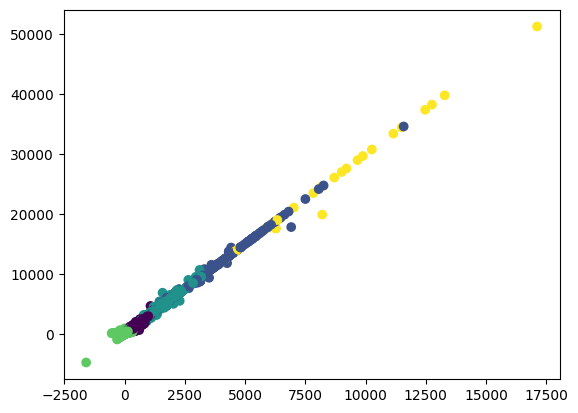

In [ ]:
# Plot results
plt.scatter(df_merged['Revenue'], df_merged['Sale (Dollars)'], c=df_merged['Cluster_5'], cmap='viridis')
plt.show()

In [ ]:
#Get basic statistics of the 5 clusters but only non scaled columns
non_scaled_columns1 = ['Sale (Dollars)', 'Volume Sold (Liters)', 'Cluster_5']
non_scaled_columns2 = ['State Bottle Cost', 'State Bottle Retail', 'Cluster_5']
non_scaled_columns3 = ['Bottles Sold', 'Revenue', 'Cluster_5']
df_merged[non_scaled_columns1].groupby('Cluster_5').describe()

Sale (Dollars)                                                \
                   count          mean          std      min       25%   
Cluster_5                                                                
0                 9366.0   1146.395835   612.681188   252.00    720.00   
1                  323.0  10730.441084  3883.664903  4410.00   8100.00   
2                 1258.0   4290.250747  1680.149217  1110.12   3168.00   
3               485956.0    106.469228   101.212186 -4801.68     34.50   
4                   40.0  22201.161000  9144.353576  9720.00  17340.42   

                                        Volume Sold (Liters)               \
                50%       75%       max                count         mean   
Cluster_5                                                                   
0            968.94   1398.60   4641.00               9366.0    66.343167   
1           9997.20  12594.24  34619.76                323.0   728.901084   
2           4050.00   5101.20  12706.32               1258.0   290.883227   
3             75.36    144.00   1169.88             485956.0     6.611322   
4          18906.24  27169.20  51327.00                 40.0  2035.162500   

                                                                  
                  std      min      25%      50%     75%     max  
Cluster_5                                                         
0           40.331633     0.45    36.00    54.00    84.0   288.0  
1          262.946511   126.00   525.00   660.00   945.0  1512.0  
2          138.863201    18.00   180.00   262.50   360.0   720.0  
3            6.370511  -648.00     1.50     4.50    10.5    90.0  
4          825.217558  1050.00  1421.25  1916.25  2100.0  5376.0

In [ ]:
df_merged[non_scaled_columns2].groupby('Cluster_5').describe()

State Bottle Cost                                              \
                      count       mean        std   min     25%     50%   
Cluster_5                                                                 
0                    9366.0  15.624832  37.248192  0.33  9.0025  12.500   
1                     323.0  14.521393   9.422748  3.50  9.7000  12.670   
2                    1258.0  14.318490   8.404970  2.13  9.4400  13.000   
3                  485956.0  10.654706   8.974854  0.00  5.5400   8.485   
4                      40.0  12.027000   5.023460  6.00  8.7000  10.450   

                            State Bottle Retail                              \
               75%      max               count       mean        std   min   
Cluster_5                                                                     
0          18.0000  2000.00              9366.0  23.450853  55.870854  0.50   
1          18.0000   137.13               323.0  21.812601  14.151208  5.25   
2          18.0975   137.88              1258.0  21.498013  12.604014  3.19   
3          12.9900   498.64            485956.0  15.991184  13.459222  0.00   
4          14.8125    30.68                40.0  18.079500   7.516143  9.00   

                                           
             25%    50%      75%      max  
Cluster_5                                  
0          13.52  18.75  27.0000  3000.00  
1          14.92  19.01  27.0000   206.07  
2          14.16  19.50  27.1475   206.82  
3           8.40  12.74  19.4900   747.96  
4          13.05  15.68  22.2200    46.02

In [ ]:
df_merged[non_scaled_columns3].groupby('Cluster_5').describe()

Bottles Sold                                                  \
                 count         mean         std    min     25%     50%   
Cluster_5                                                                
0               9366.0    65.157164   50.337245    1.0    36.0    60.0   
1                323.0   555.851393  185.749939  168.0   432.0   582.0   
2               1258.0   232.468998  113.736745   24.0   150.0   210.0   
3             485956.0     8.728576   12.254096 -648.0     3.0     6.0   
4                 40.0  1289.850000  486.317062  600.0  1080.0  1191.0   

                            Revenue                                     \
              75%     max     count         mean          std      min   
Cluster_5                                                                
0            72.0   960.0    9366.0   381.945179   203.759962    28.80   
1           660.0  1350.0     323.0  3582.080433  1301.375745  1470.00   
2           300.0  1200.0    1258.0  1428.923180   554.426499   368.88   
3            12.0   384.0  485956.0    35.492299    33.919953 -1600.56   
4          1326.0  3072.0      40.0  7471.009500  3034.885369  3240.00   

                                               
               25%     50%      75%       max  
Cluster_5                                      
0           240.00   322.8   466.20   1450.20  
1          2700.00  3321.0  4221.75  11581.92  
2          1056.00  1350.0  1699.20   4235.88  
3            11.50    25.2    48.00    335.40  
4          5781.42  6306.0  9056.40  17118.00

In [ ]:
df_merged[['Average Income ($)', 'Cluster_5']].groupby('Cluster_5').describe()

Average Income ($)                                                 \
                       count          mean           std      min       25%   
Cluster_5                                                                     
0                     9366.0  62623.218236   6879.886839  44440.0  57340.00   
1                      323.0  64328.006192   7650.620974  46759.0  59225.00   
2                     1258.0  63602.082671   8004.280871  44440.0  57340.00   
3                   485956.0  60996.511612   7009.100022  44440.0  55367.00   
4                       40.0  66726.825000  10322.578193  53688.0  61168.25   

                                      
               50%      75%      max  
Cluster_5                             
0          62742.0  68238.0  86400.0  
1          66626.0  68238.0  86400.0  
2          63201.0  68238.0  86400.0  
3          61766.0  66626.0  86400.0  
4          63765.0  68238.0  86400.0

In [ ]:
# Now for clusters using income and sales per capita

# Prepare aggregate values
df_alcohol_sum = df_alcohol.groupby('County')['Sale (Dollars)'].sum().reset_index()
df_pop = df_population[['County', 'Average Population']].copy()

# Make sure all county names are formatted the same
df_income['County'] = df_income['County'].str.lower()
df_alcohol_sum['County'] = df_alcohol_sum['County'].str.lower()
df_pop['County'] = df_pop['County'].str.lower()

# Combine data
df_pre_merged = df_income.merge(df_alcohol_sum, on='County', how='inner')
df_merged_income = df_pre_merged.merge(df_pop, on='County', how='inner')
df_merged_income.head()

# Add sales per capita feature
df_merged_income['Sales Per Capita'] = df_merged_income['Sale (Dollars)'] / df_merged_income['Average Population']
df_merged_income.head()

,County,Income: 2018-2022($),Income: 2014-2018($),Income: 2010-2014($),Average Income ($),Sale (Dollars),Average Population,Sales Per Capita
0,adair,63172,51859,47264,54098.0,100061.16,7338.0,13.636026
1,adams,64750,49229,47335,53771.0,30519.67,3753.0,8.132073
2,allamakee,64049,51057,47886,54331.0,187597.37,14006.0,13.394072
3,appanoose,50684,41111,41525,44440.0,201434.89,12487.0,16.131568
4,audubon,54973,50397,47556,50975.0,39951.18,5707.0,7.000382


In [ ]:
#Use standard scaler to transform data
df_merged_income[['Average Income T', 'Sales Per Capita T']] = scaler.fit_transform(df_merged_income[['Average Income ($)', 'Sales Per Capita']])
df_merged_income.head()

,County,Income: 2018-2022($),Income: 2014-2018($),Income: 2010-2014($),Average Income ($),Sale (Dollars),Average Population,Sales Per Capita,Average Income T,Sales Per Capita T
0,adair,63172,51859,47264,54098.0,100061.16,7338.0,13.636026,-0.506978,-0.287482
1,adams,64750,49229,47335,53771.0,30519.67,3753.0,8.132073,-0.554992,-0.938562
2,allamakee,64049,51057,47886,54331.0,187597.37,14006.0,13.394072,-0.472767,-0.316104
3,appanoose,50684,41111,41525,44440.0,201434.89,12487.0,16.131568,-1.925053,0.007723
4,audubon,54973,50397,47556,50975.0,39951.18,5707.0,7.000382,-0.965526,-1.072433


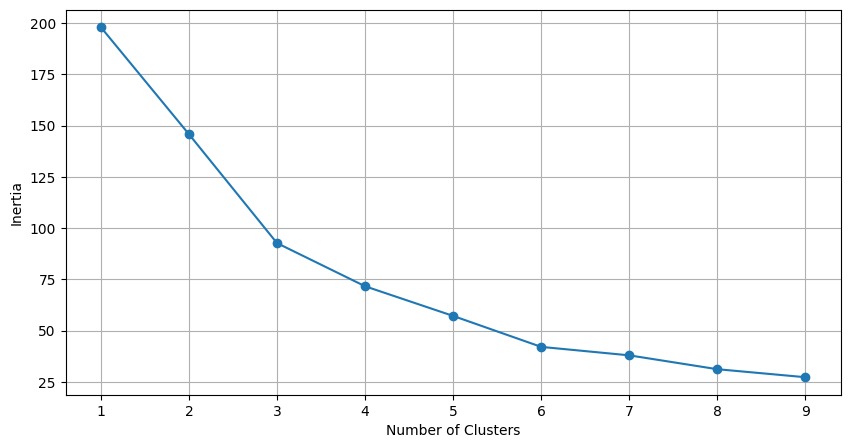

In [ ]:
#Now see what number of clusters is best
optimize_k_means(df_merged_income[['Average Income T', 'Sales Per Capita T']], 10)

In [ ]:
# Run it with 3 clusters
kmeans = KMeans(n_clusters=3)
df_merged_income['Cluster_3'] = kmeans.fit_predict(df_merged_income[['Average Income T', 'Sales Per Capita T']])
df_merged_income.head()

,County,Income: 2018-2022($),Income: 2014-2018($),Income: 2010-2014($),Average Income ($),Sale (Dollars),Average Population,Sales Per Capita,Average Income T,Sales Per Capita T,Cluster_3
0,adair,63172,51859,47264,54098.0,100061.16,7338.0,13.636026,-0.506978,-0.287482,0
1,adams,64750,49229,47335,53771.0,30519.67,3753.0,8.132073,-0.554992,-0.938562,0
2,allamakee,64049,51057,47886,54331.0,187597.37,14006.0,13.394072,-0.472767,-0.316104,0
3,appanoose,50684,41111,41525,44440.0,201434.89,12487.0,16.131568,-1.925053,0.007723,0
4,audubon,54973,50397,47556,50975.0,39951.18,5707.0,7.000382,-0.965526,-1.072433,0


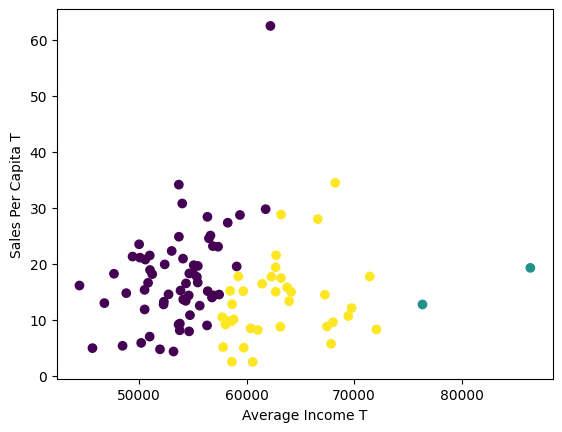

In [ ]:
# Plot the clusters with axis titles
plt.scatter(df_merged_income['Average Income ($)'], df_merged_income['Sales Per Capita'], c=df_merged_income['Cluster_3'], cmap='viridis')
plt.xlabel('Average Income T')
plt.ylabel('Sales Per Capita T')
plt.show()


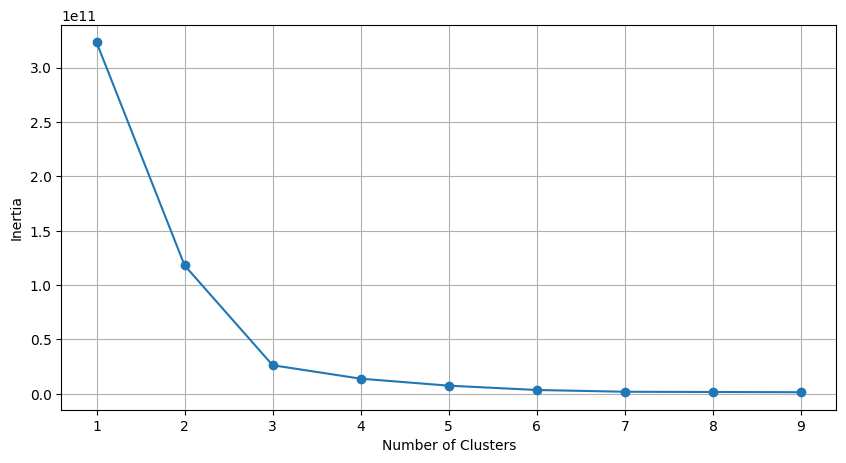

In [ ]:
# Now let's see with average population and sales per capita
optimize_k_means(df_merged_income[['Average Population', 'Sales Per Capita']], 10)

In [ ]:
# Obviously 3 clusters
kmeans = KMeans(n_clusters=3)
df_merged_income['Cluster_3'] = kmeans.fit_predict(df_merged_income[['Average Population', 'Sales Per Capita']])
df_merged_income.head()

,County,Income: 2018-2022($),Income: 2014-2018($),Income: 2010-2014($),Average Income ($),Sale (Dollars),Average Population,Sales Per Capita,Average Income T,Sales Per Capita T,Cluster_3
0,adair,63172,51859,47264,54098.0,100061.16,7338.0,13.636026,-0.506978,-0.287482,0
1,adams,64750,49229,47335,53771.0,30519.67,3753.0,8.132073,-0.554992,-0.938562,0
2,allamakee,64049,51057,47886,54331.0,187597.37,14006.0,13.394072,-0.472767,-0.316104,0
3,appanoose,50684,41111,41525,44440.0,201434.89,12487.0,16.131568,-1.925053,0.007723,0
4,audubon,54973,50397,47556,50975.0,39951.18,5707.0,7.000382,-0.965526,-1.072433,0


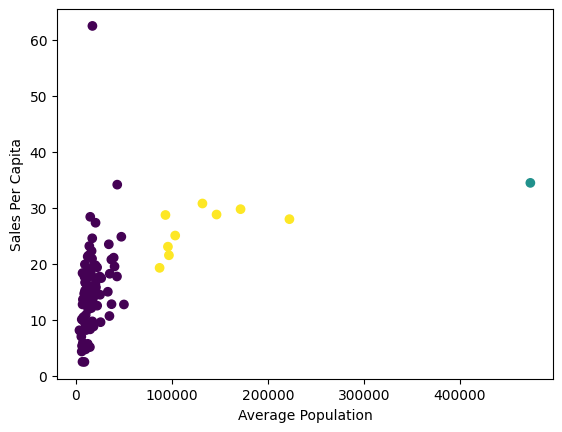

In [ ]:
# Plot the data
plt.scatter(df_merged_income['Average Population'], df_merged_income['Sales Per Capita'], c=df_merged_income['Cluster_3'], cmap='viridis')
plt.xlabel('Average Population')
plt.ylabel('Sales Per Capita')
plt.show()

In [ ]:
#Go back to original dataset to create an autoencoder
df_merged_og = df_merged[['County', 'Average Income ($)', 'Sale (Dollars)', 'Volume Sold (Liters)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
                          'Category Name', 'Revenue']]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496943 entries, 0 to 496942
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   County                496943 non-null  object 
 1   Average Income ($)    496943 non-null  float64
 2   Sale (Dollars)        496943 non-null  float64
 3   Volume Sold (Liters)  496943 non-null  float64
 4   State Bottle Cost     496943 non-null  float64
 5   State Bottle Retail   496943 non-null  float64
 6   Bottles Sold          496943 non-null  int64  
 7   Category Name         496943 non-null  object 
 8   Revenue               496943 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 34.1+ MB


In [ ]:
#Bring in pytorch for the autoencoder and construct it
import torch
import torch.nn as nn
import torch.optim as optim

#Autoencoder architecture

class TabularAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super(TabularAutoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.LeakyReLU(),
            nn.Linear(16, 8),
            nn.LeakyReLU(),
            nn.Linear(8, 4),
            nn.LeakyReLU(),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),           # Expand latent space
            nn.LeakyReLU(),
            nn.Linear(8, 16),          # Expand further
            nn.LeakyReLU(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Forward pass through encoder
        encoded = self.encoder(x)
        # Forward pass through decoder
        decoded = self.decoder(encoded)
        return decoded


In [ ]:
#Now let's scale the data
df_merged_og[['Sale (T)', 'Volume Sold (T)', 'State Bottle Cost (T)', 'State Bottle Retail (T)', 'Bottles Sold (T)', 'Revenue (T)']] = scaler.fit_transform(df_merged_og[['Sale (Dollars)', 'Volume Sold (Liters)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Revenue']])

<ipython-input-39-10a2ff8d5728>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_og[['Sale (T)', 'Volume Sold (T)', 'State Bottle Cost (T)', 'State Bottle Retail (T)', 'Bottles Sold (T)', 'Revenue (T)']] = scaler.fit_transform(df_merged_og[['Sale (Dollars)', 'Volume Sold (Liters)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Revenue']])
<ipython-input-39-10a2ff8d5728>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_og[['Sale (T)', 'Volume Sold (T)', 'State Bottle Cost (

In [ ]:
#List of the features that will actually be going into the autoencoder
scaled_list = ['Sale (T)', 'Volume Sold (T)', 'State Bottle Cost (T)', 'State Bottle Retail (T)', 'Bottles Sold (T)', 'Revenue (T)']

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create a tensor from the scaled data
X = torch.tensor(df_merged_og[scaled_list].values, dtype=torch.float32)

# Create DataLoader for batch training
batch_size = 32
dataset = TensorDataset(X)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Loss function and Adam Opimizer
criterion = nn.MSELoss()

#Instantiate the autoencoder
model = TabularAutoencoder(input_dim=len(scaled_list))
#Adam Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Now we train the autoencoder
num_epochs = 50  # You can adjust this
for epoch in range(num_epochs):
    running_loss = 0.0

    for batch in data_loader:
        inputs = batch[0]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, inputs)  # Compare the reconstruction with the input

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print average loss per epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(data_loader):.4f}")

Epoch [1/50], Loss: 0.7953
Epoch [2/50], Loss: 0.7857
Epoch [3/50], Loss: 0.7848
Epoch [4/50], Loss: 0.7851


KeyboardInterrupt: 